# Analysis of Venues and Prices of Apartments in Bengaluru
#### Import the necessary modules

In [1]:
import pandas as pd
import numpy as np
import time
import requests
from random import randint

#Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#Import k-means from clustering stage
from sklearn.cluster import KMeans

# map rendering library
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    pandas-1.0.3               |   py36h830a2c2_1        11.1 MB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-

In [2]:
!conda install BeautifulSoup4 --yes

!conda install lxml --yes

!conda install html5lib --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.0       |           py36_0         167 KB
    ca-certificates-2020.1.1   |                0         125 KB
    certifi-2020.4.5.1         |           py36_0         155 KB
    openssl-1.1.1g             |       h7b6447c_0         2.5 MB
    soupsieve-2.0.1            |             py_0          33 KB
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  beautifulsoup4     pkgs/main/linux-64::beautifulsoup4-4.9.0-py36_0
  soupsieve          pkgs/main/noarch::soupsieve-2.0.1-py_0

The following packages will be SUPERSEDED by a higher-priority chann

In [3]:
#For web-scraping
import urllib.request
from bs4 import BeautifulSoup

In [4]:
#Convert an address into latitude and longitude values

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0

The following packages will be UPDATED:

  ca-certificates     pkgs/main::ca-certificates-2020.1.1-0 --> conda-forge::ca-certificates-2020.4.5.1-hecc5488_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi    

### ---------------- Get the main neighbourhoods of Bangalore from Wikipedia ------------------

In [5]:
#Get Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "html5lib")

In [6]:
#Add items from the table of contents in a list
areas = soup.find_all('span', attrs={'class':'toctext'})

In [7]:
#Get all tables from the Wikipedia page
allTables = soup.findAll('table', class_ = 'wikitable sortable')

In [8]:
#Create a list of the neighborhoods and their areas
neighbList = []
#For each table
for tableIndex in range(0,len(allTables)):    
    rows = allTables[tableIndex].findAll('tr')
    totalRows = len(rows)
    #For each row
    for rowIndex in range(0,totalRows):
        data = rows[rowIndex].findAll('td')
        dataLen = len(data)
        #For each data column
        for dataIndex in range(0,dataLen):
            #Get the first column only
            if np.mod(dataIndex, 3) == 0:
                titles = data[dataIndex].findAll('a')
                titleLen = len(titles)
                for titleIndex in range(0,titleLen):
                    neighbList.append([titles[titleIndex].text, areas[tableIndex].text])

#### Convert list to dataframe containing neighbourhoods and their areas

In [9]:
#Converting the list to a dataframe
df = pd.DataFrame(neighbList, columns = ['Neighbourhood','Area'])
df.head()

,Neighbourhood,Area
0,Cantonment,Central
1,Domlur,Central
2,Indiranagar,Central
3,Jeevanbheemanagar,Central
4,Malleswaram,Central


#### Add the neighbourhoods to a CSV file

In [10]:
df.to_csv("BengaluruNeighbourhoods.csv")

#### Get the latitude and the longitude coordinates of each neighbourhood from a CSV file
#### Added a few more neighbourhoods to the file and fetched their longitude and latitude from Google.

In [11]:
df_neighb = pd.read_csv('BengaluruAllNeighbourhoods.csv', encoding= 'unicode_escape')
df_neighb = df_neighb[['Neighbourhood','Area','Latitude','Longitude']]
df_neighb.sort_values(by='Neighbourhood', inplace=True)
df_neighb.reset_index(drop=True, inplace=True)
df_neighb.head()

,Neighbourhood,Area,Latitude,Longitude
0,Anjanapura,Southern,12.8549,77.5543
1,Arekere,Southern,12.8874,77.5969
2,Austin Town,Central,12.9588,77.6160
3,BTM Layout,South-Eastern,12.9166,77.6101
4,Banashankari,Southern,12.9255,77.5468


In [12]:
print("{} neighbourhoods in Bangalore".format(df_neighb.shape[0]))

71 neighbourhoods in Bangalore


### ------------------------ Plot neighbourhoods of Bangalore on a map --------------------------

In [13]:
address = 'Bengaluru, Karnataka, India'
geolocator = Nominatim(user_agent="Bengaluru")
location = geolocator.geocode(address)
latitude_bangalore = location.latitude
longitude_bangalore = location.longitude
print('The geograpical coordinates of Bangalore are {}, {}.'.format(latitude_bangalore, longitude_bangalore))

The geograpical coordinates of Bangalore are 12.9791198, 77.5912997.


In [14]:
#Plot Bangalore city and its neighbourhoods on a map
bangalore_map = folium.Map(location=[latitude_bangalore, longitude_bangalore], zoom_start=15)

#Add neighbourhoods to the map
for lat, long, neighbourhood in zip(df_neighb['Latitude'], df_neighb['Longitude'], df_neighb['Neighbourhood']):
    label = folium.Popup(neighbourhood, parse_html=True)
    folium.Marker(
        [lat, long],
        popup=label,
        ).add_to(bangalore_map)  
bangalore_map

### ------------------------------------ Explore venues in Bangalore ----------------------------------

#### Get venue data from Foursquare

In [15]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [16]:
#Defining radius and limit of venues to get
radius=1000
LIMIT=100

In [17]:
#Function to get the venue details of each neighbourhood and return them in a dataframe
def getNearbyVenues(names, area, latitudes, longitudes):
    venuesList = []
    for name, area, lat, long in zip(names, area, latitudes, longitudes):
        #Create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            radius, 
            LIMIT)
    
        #Make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        for item in results:
            venuesList.append([
            name, area, lat, long,
            item['venue']['name'], 
            item['venue']['location']['lat'], 
            item['venue']['location']['lng'], 
            item['venue']['categories'][0]['name']])
    #Create a dataframe
    df_nearby_venues = pd.DataFrame(venuesList, columns = ['Neighbourhood', 
                                                      'Area',
                                                      'Neighbourhood Latitude', 
                                                      'Neighbourhood Longitude', 
                                                      'Venue', 
                                                      'Venue Latitude', 
                                                      'Venue Longitude', 
                                                      'Venue Category'] ) 
    return(df_nearby_venues)

In [18]:
df_nearby_venues = getNearbyVenues(names=df_neighb['Neighbourhood'],
                                  area=df_neighb['Area'],
                                  latitudes=df_neighb['Latitude'],
                                  longitudes=df_neighb['Longitude'])

In [19]:
print("Found {} venues in Bangalore from Foursquare".format(df_nearby_venues.shape[0]))

Found 1970 venues in Bangalore from Foursquare


In [20]:
df_nearby_venues.head()

,Neighbourhood,Area,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Anjanapura,Southern,12.8549,77.5543,capital club resorts,12.855979,77.555653,Pool
1,Anjanapura,Southern,12.8549,77.5543,Vajramuni Nursery,12.859999,77.547890,Flower Shop
2,Arekere,Southern,12.8874,77.5969,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
3,Arekere,Southern,12.8874,77.5969,Natural Ice Cream,12.892188,77.598222,Ice Cream Shop
4,Arekere,Southern,12.8874,77.5969,Chavadi,12.892199,77.602538,BBQ Joint


In [21]:
#Number of venues in each neighbourhood

df_nearby_venues.groupby("Neighbourhood").count()

,Area,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,,
Anjanapura,2,2,2,2,2,2,2
Arekere,21,21,21,21,21,21,21
Austin Town,7,7,7,7,7,7,7
BTM Layout,49,49,49,49,49,49,49
Banashankari,21,21,21,21,21,21,21
...,...,...,...,...,...,...,...
Vijayanagar,18,18,18,18,18,18,18
Whitefield,18,18,18,18,18,18,18
Wilson Garden,20,20,20,20,20,20,20


#### ------------------------------------ Get an overview of venue categories -------------------------------------

In [22]:
#One hot encoding
df_venues_onehot = pd.get_dummies(df_nearby_venues[['Venue Category']], prefix="", prefix_sep="")

#Add neighborhood column to dataframe
df_venues_onehot.insert(0, 'Neighbourhood', df_nearby_venues['Neighbourhood'])
df_venues_onehot.head()

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,...,Tram Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Anjanapura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Anjanapura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arekere,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arekere,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Arekere,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
print("{} types of venues in Bangalore".format(df_venues_onehot.shape[1]-1))

200 types of venues in Bangalore


#### Calculate the percentage of each venue category

In [24]:
#Calculate percentage of each venue category

df_neighb_venues_grp = df_venues_onehot.groupby('Neighbourhood').sum().reset_index()
df_venues_grouped = df_neighb_venues_grp.sum(axis=0).reset_index()
df_venues_grouped.drop(df_venues_grouped.index[0], inplace=True)
df_venues_grouped.columns = ['Venue Category', 'Count']

total_venues = df_venues_grouped['Count'].sum()
df_venues_grouped['Percentage'] = (df_venues_grouped['Count']/total_venues)*100
df_venues_grouped
df_venues_grouped.head()

,Venue Category,Count,Percentage
1,ATM,4,0.203046
2,Accessories Store,1,0.0507614
3,Afghan Restaurant,1,0.0507614
4,American Restaurant,3,0.152284
5,Andhra Restaurant,9,0.456853


In [25]:
df_top30 = df_venues_grouped.sort_values(by=['Count'], ascending=False).reset_index(drop=True).head(30)
df_top30.head()

,Venue Category,Count,Percentage
0,Indian Restaurant,359,18.2234
1,Café,132,6.70051
2,Fast Food Restaurant,79,4.01015
3,Ice Cream Shop,68,3.45178
4,Coffee Shop,65,3.29949


#### ---------------------- Plot a bar graph to visualize the top 30 types of venues in Bangalore -------------------

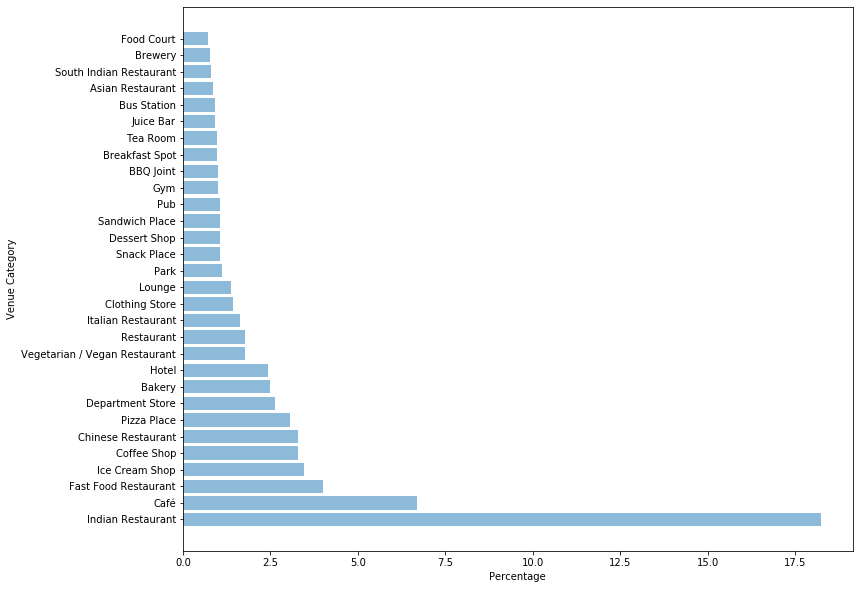

In [26]:
fig, ax = plt.subplots(figsize=(12,10))
plt.barh( df_top30['Venue Category'], df_top30['Percentage'], align='center', alpha=0.5)
ax.set_ylabel('Venue Category')
ax.set_xlabel('Percentage')
plt.savefig('Top30Venues.png', bbox_inches='tight')
plt.show()

#### ----------------------------------- Get top 5 venues in each neighbourhood --------------------------------------

In [28]:
def mostCommonVenues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
df_neighb_venues_grp.head()

,Neighbourhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,...,Tram Station,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Anjanapura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Austin Town,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BTM Layout,0,0,0,0,0,0,0,0,1,...,0,0,0,4,0,0,0,0,0,0
4,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

#Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

#Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = df_neighb_venues_grp['Neighbourhood']

for ind in np.arange(df_neighb_venues_grp.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = mostCommonVenues(df_neighb_venues_grp.iloc[ind, :], num_top_venues)

In [31]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Anjanapura,Pool,Flower Shop,Event Space,Food,Flea Market
1,Arekere,Pizza Place,Indian Restaurant,Ice Cream Shop,Department Store,Chinese Restaurant
2,Austin Town,Indian Restaurant,Café,Indie Movie Theater,Italian Restaurant,Donut Shop
3,BTM Layout,Indian Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Coffee Shop,Snack Place
4,Banashankari,Pizza Place,Clothing Store,Indian Restaurant,Café,Toy / Game Store


## ------------- Get the cost of purchasing an apartment in Bangalore ----------
#### Web scrape data from Makaan.com

In [32]:
def getPropertyRates(url, totalPages, totalColumns):
    neighbPropRates = []
    #For each page
    for pageNumber in range(1, totalPages+1):
        time.sleep(2)
        if pageNumber > 1:
            urlFull = url+'?page={}'.format(pageNumber)
        else:
            urlFull = url
        page = urllib.request.urlopen(urlFull)
        soup = BeautifulSoup(page,'html.parser')
        #Get the table
        allTables = soup.findAll('table', class_ = 'tbl')
        tbody = allTables[0].findAll('tbody')
        #Get all table rows
        rows = tbody[0].findAll('tr')
        totalRows = len(rows)
        #For each row in the table
        for rowIndex in range(0, totalRows):
            columns = rows[rowIndex].findAll('td')
            oneRowList = []
            for columnIndex in range(0, totalColumns):
                oneRowList.append(columns[columnIndex].text)
            neighbPropRates.append(oneRowList)
    return neighbPropRates

#### Create a dataframe containing buying prices property in Bengaluru neighbourhoods

In [34]:
totalPages = 85
url = 'https://www.makaan.com/price-trends/property-rates-for-buy-in-bangalore'
neighbBuyProp = getPropertyRates(url, totalPages, totalColumns=3)
df_neighbBuyProp = pd.DataFrame(data = neighbBuyProp, columns = ['Neighbourhood', 'Price Range Per Sqft','Average Price Per Sqft'])
df_neighbBuyProp.head()

,Neighbourhood,Price Range Per Sqft,Average Price Per Sqft
0,HSR Layout,"1,667 - 30,612 / sqft","12,264.02 / sqft"
1,Koramangala,"5,634 - 25,170 / sqft","19,127.7 / sqft"
2,Whitefield,"2,279 - 20,394 / sqft","8,196.71 / sqft"
3,Krishnarajapura,"1,875 - 18,335 / sqft","9,549.69 / sqft"
4,Begur,"3,125 - 17,606 / sqft","8,790.99 / sqft"


In [35]:
#Save the dataframe to a CSV file

df_neighbBuyProp.to_csv('BengaluruBuyProperty.csv')

#### Keep only the neighbourhoods mentioned in the neighbourhoods CSV file

In [37]:
df_neighbBuyProp = pd.merge(df_neighb, df_neighbBuyProp, how='left')
df_neighbBuyProp.head()

,Neighbourhood,Area,Latitude,Longitude,Price Range Per Sqft,Average Price Per Sqft
0,Anjanapura,Southern,12.8549,77.5543,"3,456 - 6,667 / sqft","5,622.85 / sqft"
1,Arekere,Southern,12.8874,77.5969,-,-
2,Austin Town,Central,12.9588,77.6160,-,-
3,BTM Layout,South-Eastern,12.9166,77.6101,"3,750 - 95,146 / sqft","70,450.27 / sqft"
4,Banashankari,Southern,12.9255,77.5468,"2,239 - 12,987 / sqft","11,642.02 / sqft"


In [38]:
df_neighbBuyProp.shape

(77, 6)

In [39]:
#Check which values of the master dataframe are missing

df_neighbBuyProp.loc[(df_neighbBuyProp['Price Range Per Sqft'] == '-') | (df_neighbBuyProp['Average Price Per Sqft'] == '-')]

,Neighbourhood,Area,Latitude,Longitude,Price Range Per Sqft,Average Price Per Sqft
1,Arekere,Southern,12.8874,77.5969,-,-
2,Austin Town,Central,12.9588,77.6160,-,-
7,Basaveshwaranagar,Western,12.9880,77.5375,-,-
11,Benson Town,Central,13.0047,77.5999,-,-
30,Indiranagar,Central,12.9784,77.6408,-,-
34,Jeevan Bheema Nagar,Central,12.9642,77.6581,-,-
41,Kothnur,Southern,13.0552,77.6422,-,-
45,Lingarajapuram,North-Eastern,13.0130,77.6262,-,-
46,Madiwala,South-Eastern,12.9226,77.6174,-,-
51,Mathikere,Northern,13.0334,77.5640,-,-


#### The dataset seems to contain duplicate rows as the number of neighbourhoods is 79, instead of 73. It also contains missing values. Export the dataframe to a CSV file and make corrections.

In [40]:
df_neighbBuyProp.to_csv('BengaluruBuyProperty.csv')

#### -------------------------------- Get the rectified dataset from CSV file ----------------------------------

In [41]:
df_neighbBuyProp = pd.read_csv('BengaluruCorrBuyProperty.csv', encoding= 'unicode_escape')

df_neighbBuyProp.drop(df_neighbBuyProp.iloc[:,0:1], inplace=True, axis=1)
df_neighbBuyProp.head()

,Neighbourhood,Area,Latitude,Longitude,Price range per sqft,Avg price per sqft
0,Anjanapura,Southern,12.8549,77.5543,"3,456 - 6,667 / sqft",5622.85 / sqft
1,Arekere,Southern,12.8874,77.5969,"3,500 - 6,621 / sqft",4922.68 / sqft
2,Austin Town,Central,12.9588,77.6160,"4,999 - 6,200 / sqft",5185 / sqft
3,BTM Layout,South-Eastern,12.9166,77.6101,"4,060-6,998 / sqft",5529 / sqft
4,Banashankari,Southern,12.9255,77.5468,"2,239 - 12,987 / sqft",11642.02 / sqft


#### ---------------------------------- Change figures to a more appropriate form ----------------------------------

In [42]:
#Remove 'per sqaure feet' from the dataframe

df_neighbBuyProp.replace(' / sqft','', inplace=True, regex=True) 
df_neighbBuyProp.head()

,Neighbourhood,Area,Latitude,Longitude,Price range per sqft,Avg price per sqft
0,Anjanapura,Southern,12.8549,77.5543,"3,456 - 6,667",5622.85
1,Arekere,Southern,12.8874,77.5969,"3,500 - 6,621",4922.68
2,Austin Town,Central,12.9588,77.6160,"4,999 - 6,200",5185
3,BTM Layout,South-Eastern,12.9166,77.6101,"4,060-6,998",5529
4,Banashankari,Southern,12.9255,77.5468,"2,239 - 12,987",11642.02


In [43]:
#Create lower and upper limit columns for price range

df_neighbBuyProp[['Minimum Price Per Sqft','Maximum Price Per Sqft']] = df_neighbBuyProp['Price range per sqft'].str.split("-",expand=True)
df_neighbBuyProp.head()

,Neighbourhood,Area,Latitude,Longitude,Price range per sqft,Avg price per sqft,Minimum Price Per Sqft,Maximum Price Per Sqft
0,Anjanapura,Southern,12.8549,77.5543,"3,456 - 6,667",5622.85,"3,456","6,667"
1,Arekere,Southern,12.8874,77.5969,"3,500 - 6,621",4922.68,"3,500","6,621"
2,Austin Town,Central,12.9588,77.6160,"4,999 - 6,200",5185,"4,999","6,200"
3,BTM Layout,South-Eastern,12.9166,77.6101,"4,060-6,998",5529,"4,060","6,998"
4,Banashankari,Southern,12.9255,77.5468,"2,239 - 12,987",11642.02,"2,239","12,987"


In [110]:
#Alter column names

df_neighbBuyProp.rename(columns={'Price range per sqft': 'Price Range Per Sqft (in Rupees)',
                             'Avg price per sqft': 'Avg Price Per Sqft (in Rupees)',
                             'Minimum Price Per Sqft': 'Minimum Price Per Sqft (in Rupees)',
                             'Maximum Price Per Sqft': 'Maximum Price Per Sqft (in Rupees)'}, inplace=True)

#### ----------------------------- Visualize average property rates in Bangalore -------------------------------------

In [112]:
#Strip extra spaces
df_neighbBuyProp['Minimum Price Per Sqft (in Rupees)'] = df_neighbBuyProp['Minimum Price Per Sqft (in Rupees)'].str.strip()
df_neighbBuyProp['Maximum Price Per Sqft (in Rupees)'] = df_neighbBuyProp['Maximum Price Per Sqft (in Rupees)'].str.strip()

#Remove commas
df_neighbBuyProp.replace(to_replace = ",", value = "", regex=True, inplace=True)

#Convert columns to numeric
df_neighbBuyProp['Avg Price Per Sqft (in Rupees)'] = pd.to_numeric(df_neighbBuyProp['Avg Price Per Sqft (in Rupees)'])
df_neighbBuyProp['Minimum Price Per Sqft (in Rupees)'] = pd.to_numeric(df_neighbBuyProp['Minimum Price Per Sqft (in Rupees)'])
df_neighbBuyProp['Maximum Price Per Sqft (in Rupees)'] = pd.to_numeric(df_neighbBuyProp['Maximum Price Per Sqft (in Rupees)'])
df_neighbBuyProp.head()

,Neighbourhood,Area,Latitude,Longitude,Price Range Per Sqft (in Rupees),Avg Price Per Sqft (in Rupees),Minimum Price Per Sqft (in Rupees),Maximum Price Per Sqft (in Rupees)
0,Anjanapura,Southern,12.8549,77.5543,3456 - 6667,5622.85,3456,6667
1,Arekere,Southern,12.8874,77.5969,3500 - 6621,4922.68,3500,6621
2,Austin Town,Central,12.9588,77.6160,4999 - 6200,5185.00,4999,6200
3,BTM Layout,South-Eastern,12.9166,77.6101,4060-6998,5529.00,4060,6998
4,Banashankari,Southern,12.9255,77.5468,2239 - 12987,11642.02,2239,12987


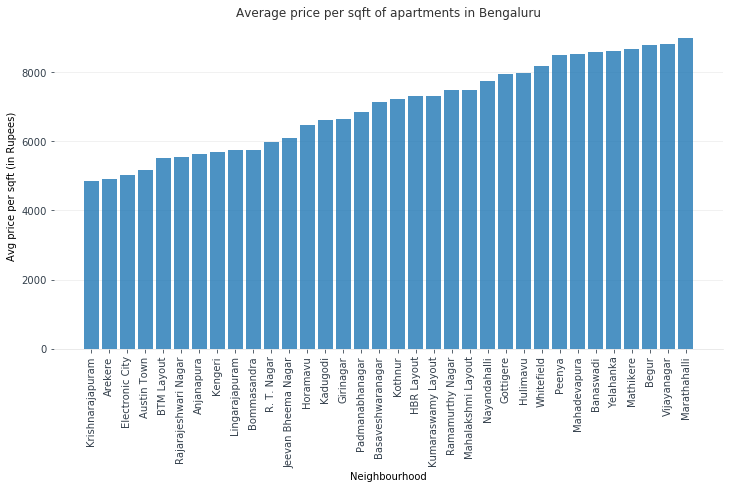

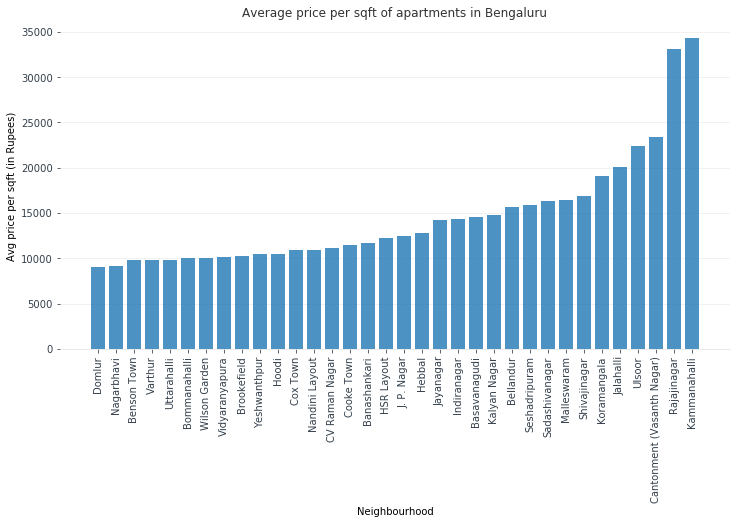

In [113]:
#Sort by column 'Avg price per sqft' in ascending order of 
df_sortedAvg = df_neighbBuyProp.sort_values(by='Avg Price Per Sqft (in Rupees)')

#Divide neighbourhoods into two groups and plot bar charts
lower = 0
upper = 34
count = 1
while upper <= 68:
    df = df_sortedAvg.iloc[lower:upper,:]
    fig, ax = plt.subplots(figsize=(12,6))
    plt.bar(df['Neighbourhood'], df['Avg Price Per Sqft (in Rupees)'], align='center', alpha=0.8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)
    ax.set_ylabel('Avg price per sqft (in Rupees)')
    ax.set_xlabel('Neighbourhood')
    plt.xticks(rotation=90)
    ax.set_title('Average price per sqft of apartments in Bengaluru', color='#333333', size=12)
    plt.savefig('AvgPrice{}.png'.format(count), bbox_inches='tight')
    plt.show()
    lower = lower + 34
    upper = upper + 34
    count = count + 1

#### ---------------------------------------- Minimum price per sqft ------------------------------------------------

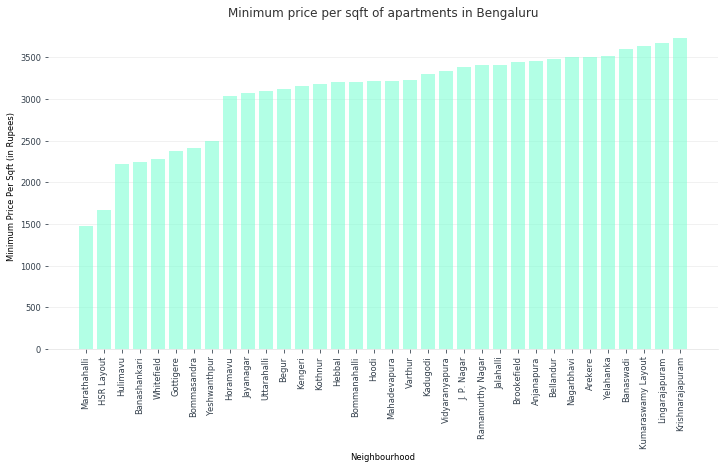

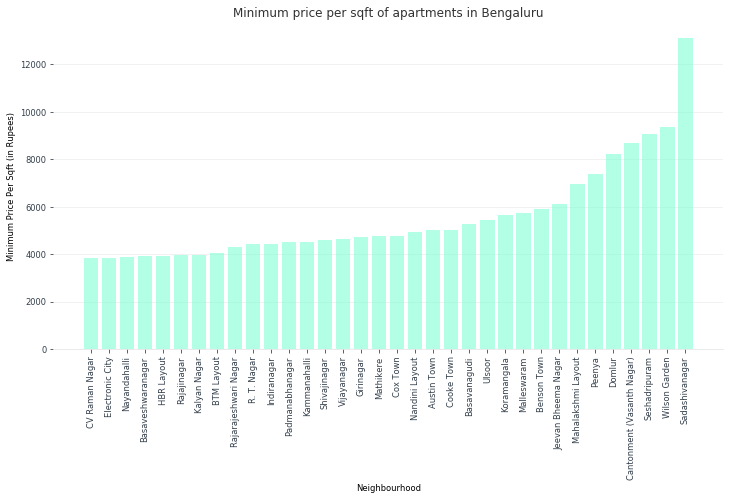

In [116]:
#Sort by column 'Minimum price per sqft' in ascending order of 
df_sortedMin = df_neighbBuyProp.sort_values(by='Minimum Price Per Sqft (in Rupees)')

#Divide neighbourhoods into two groups and plot bar charts
lower = 0
upper = 34
count = 1
while upper <= 68:
    df = df_sortedMin.iloc[lower:upper,:]
    fig, ax = plt.subplots(figsize=(12,6))
    plt.bar(df['Neighbourhood'], df['Minimum Price Per Sqft (in Rupees)'], align='center', alpha=0.6, color='aquamarine')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)
    ax.set_ylabel('Minimum Price Per Sqft (in Rupees)', size='small')
    ax.set_xlabel('Neighbourhood', size='small')
    plt.yticks(size='small')
    plt.xticks(size='small',rotation=90)
    ax.set_title('Minimum price per sqft of apartments in Bengaluru', color='#333333', size=12)
    plt.savefig('MinPrice{}.png'.format(count), bbox_inches='tight')
    plt.show()
    lower = lower + 34
    upper = upper + 34
    count = count + 1

#### ------------------------------------------- Maximum price per sqft ------------------------------------------------

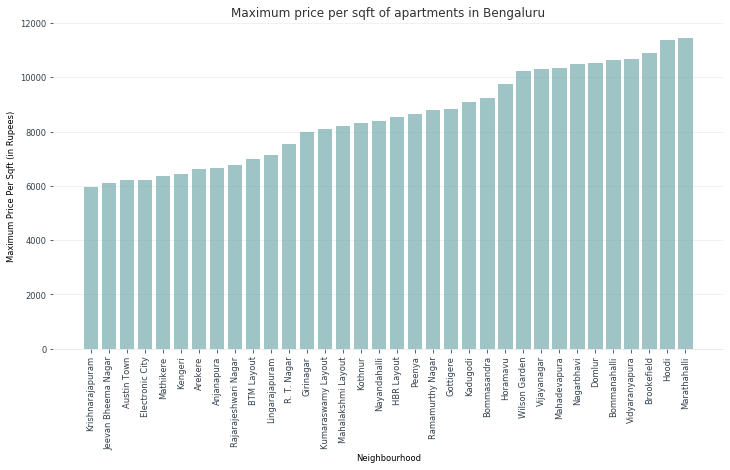

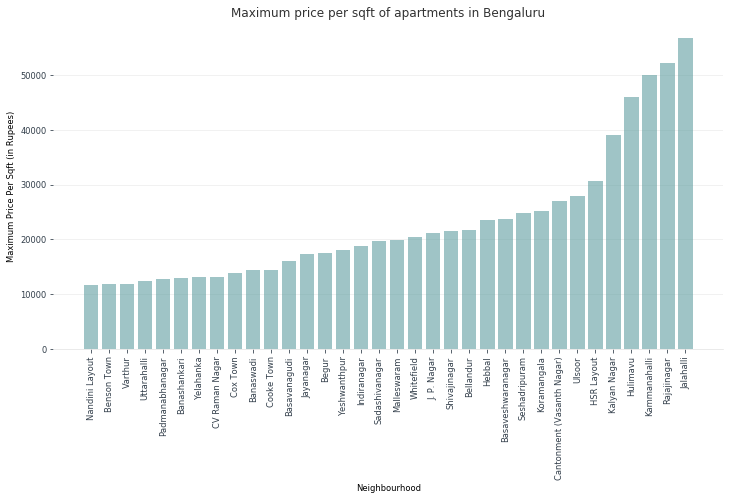

In [117]:
#Sort by column 'Maximum price per sqft' in ascending order 
df_sortedMax = df_neighbBuyProp.sort_values(by='Maximum Price Per Sqft (in Rupees)')

#Divide neighbourhoods into two groups and plot bar charts
lower = 0
upper = 34
count = 1
while upper <= 68:
    df = df_sortedMax.iloc[lower:upper,:]
    fig, ax = plt.subplots(figsize=(12,6))
    plt.bar(df['Neighbourhood'], df['Maximum Price Per Sqft (in Rupees)'], align='center', alpha=0.6, color='cadetblue')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)
    ax.set_ylabel('Maximum Price Per Sqft (in Rupees)', size='small')
    ax.set_xlabel('Neighbourhood', size='small')
    plt.yticks(size='small')
    plt.xticks(size='small',rotation=90)
    ax.set_title('Maximum price per sqft of apartments in Bengaluru', color='#333333', size=12)
    plt.savefig('MaxPrice{}.png'.format(count), bbox_inches='tight')
    plt.show()
    lower = lower + 34
    upper = upper + 34
    count = count + 1

In [118]:
df_histo = df_neighbBuyProp.iloc[:,5:]
df_histo.head()

,Avg Price Per Sqft (in Rupees),Minimum Price Per Sqft (in Rupees),Maximum Price Per Sqft (in Rupees)
0,5622.85,3456,6667
1,4922.68,3500,6621
2,5185.00,4999,6200
3,5529.00,4060,6998
4,11642.02,2239,12987


#### Plot a histogram

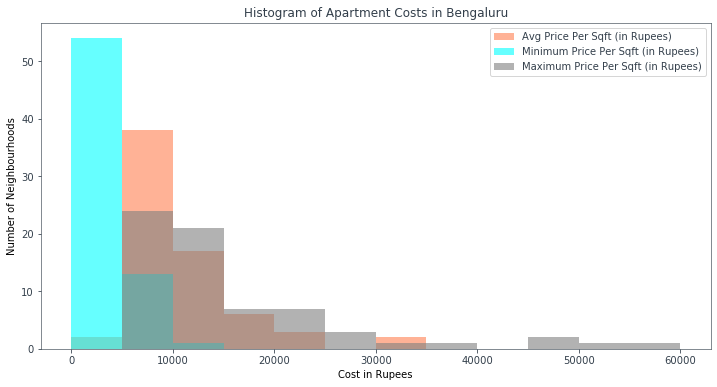

In [119]:
bins_list = [0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000]

df_histo.plot(kind ='hist', 
          figsize=(12, 6),
          bins=bins_list,
          alpha=0.6,
          color=['coral', 'aqua', 'gray']
         )
plt.title('Histogram of Apartment Costs in Bengaluru')
plt.ylabel('Number of Neighbourhoods')
plt.xlabel('Cost in Rupees') 
plt.savefig('Histogram.png', bbox_inches='tight')
plt.show()

### --------------------------------------- Examine area-wise ------------------------------------------

In [105]:
#Avg price per sqft

df_neighbBuyProp.groupby('Area')['Avg Price Per Sqft (in Rupees)'].describe()

,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
Central,14.0,13434.478571,5493.695382,5185.00,9826.5925,12881.410,16410.0375,23429.36
Eastern,9.0,8772.211111,2017.446321,4850.00,8196.7100,9000.000,10290.4700,11191.32
North-Eastern,7.0,12096.061429,10228.514622,5739.69,6901.5100,7493.050,11676.8350,34283.00
Northern,8.0,10641.601250,4265.016387,5982.00,8589.2700,9392.020,11021.3975,20044.00
South-Eastern,7.0,10483.314286,5508.998594,5029.00,5636.2150,9991.830,13981.1200,19127.70
South-Western,1.0,8818.800000,NaN,8818.80,8818.8000,8818.800,8818.8000,8818.80
Southern,14.0,9002.896429,3087.216329,4922.68,6955.8275,7970.825,11181.9150,14509.82
Western,8.0,10860.371250,9176.936919,5537.00,6778.2850,7626.000,9624.5525,33151.00


In [106]:
#Minimum Price Per Sqft

df_neighbBuyProp.groupby('Area')['Minimum Price Per Sqft (in Rupees)'].describe()

,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
Central,14.0,6813.500000,2516.215160,4430.0,4999.25,5813.0,8573.25,13092.0
Eastern,9.0,3079.444444,745.004884,1476.0,3211.00,3225.0,3445.00,3830.0
North-Eastern,7.0,3731.000000,471.903592,3035.0,3502.50,3667.0,3941.00,4528.0
Northern,8.0,4062.000000,1509.929705,2500.0,3299.75,3461.0,4502.75,7364.0
South-Eastern,7.0,3469.285714,1265.722549,1667.0,2805.00,3478.0,3948.00,5634.0
South-Western,1.0,4643.000000,NaN,4643.0,4643.00,4643.0,4643.00,4643.0
Southern,14.0,3412.571429,903.694785,2222.0,3081.00,3281.5,3602.00,5263.0
Western,8.0,4325.250000,1189.068753,3160.0,3773.75,3937.5,4465.50,6970.0


In [107]:
#Maximum Price Per Sqft

df_neighbBuyProp.groupby('Area')['Maximum Price Per Sqft (in Rupees)'].describe()

,count,mean,std,min,25%,50%,75%,max
Area,,,,,,,,
Central,14.0,16623.571429,7242.942493,6108.0,10855.00,16660.0,21099.75,27972.0
Eastern,9.0,11627.222222,3876.324863,5969.0,10347.00,11360.0,11947.00,20394.0
North-Eastern,7.0,19638.857143,17398.594229,7137.0,8651.50,9744.0,26690.50,49907.0
Northern,8.0,18075.750000,16626.107712,6375.0,8363.25,11924.5,19382.25,56670.0
South-Eastern,7.0,15791.285714,9836.960552,6222.0,8118.00,10632.0,23418.50,30612.0
South-Western,1.0,10286.000000,NaN,10286.0,10286.00,10286.0,10286.00,10286.0
Southern,14.0,14490.000000,10165.741556,6621.0,8141.75,12569.5,17079.50,46000.0
Western,8.0,15984.250000,15643.951672,6451.0,7841.25,9435.5,14687.75,52174.0


### ------------------------------ Cluster neighbourhoods in Bengaluru -----------------------------

In [121]:
#Dataframe for KMeans

df_kmeans = df_neighbBuyProp.iloc[:, 5:]
df_kmeans.head()

,Avg Price Per Sqft (in Rupees),Minimum Price Per Sqft (in Rupees),Maximum Price Per Sqft (in Rupees)
0,5622.85,3456,6667
1,4922.68,3500,6621
2,5185.00,4999,6200
3,5529.00,4060,6998
4,11642.02,2239,12987


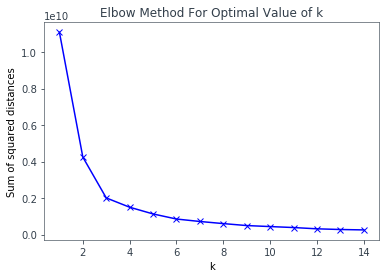

In [122]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_kmeans)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal Value of k')
plt.show()

In [123]:
#Kmeans clustering. Optimal value of k is 3

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_kmeans)

df_neighbCluster = df_neighbBuyProp.copy()
# df_neighbCluster.drop(df_neighbCluster[df_neighbCluster['Neighbourhood']=='Madiwala'].index, axis=0, inplace=True)
df_neighbCluster.insert(0, 'Cluster Labels', kmeans.labels_)
df_neighbCluster.head()

,Cluster Labels,Neighbourhood,Area,Latitude,Longitude,Price Range Per Sqft (in Rupees),Avg Price Per Sqft (in Rupees),Minimum Price Per Sqft (in Rupees),Maximum Price Per Sqft (in Rupees)
0,0,Anjanapura,Southern,12.8549,77.5543,3456 - 6667,5622.85,3456,6667
1,0,Arekere,Southern,12.8874,77.5969,3500 - 6621,4922.68,3500,6621
2,0,Austin Town,Central,12.9588,77.6160,4999 - 6200,5185.00,4999,6200
3,0,BTM Layout,South-Eastern,12.9166,77.6101,4060-6998,5529.00,4060,6998
4,0,Banashankari,Southern,12.9255,77.5468,2239 - 12987,11642.02,2239,12987


### -------------------------------------- Analyze Clusters--------------------------------------
### Cluster 0

In [125]:
df_neighbCluster.loc[df_neighbCluster['Cluster Labels'] == 0, df_neighbCluster.columns[list(range(1, df_neighbCluster.shape[1]))]]

,Neighbourhood,Area,Latitude,Longitude,Price Range Per Sqft (in Rupees),Avg Price Per Sqft (in Rupees),Minimum Price Per Sqft (in Rupees),Maximum Price Per Sqft (in Rupees)
0,Anjanapura,Southern,12.8549,77.5543,3456 - 6667,5622.85,3456,6667
1,Arekere,Southern,12.8874,77.5969,3500 - 6621,4922.68,3500,6621
2,Austin Town,Central,12.9588,77.6160,4999 - 6200,5185.00,4999,6200
3,BTM Layout,South-Eastern,12.9166,77.6101,4060-6998,5529.00,4060,6998
4,Banashankari,Southern,12.9255,77.5468,2239 - 12987,11642.02,2239,12987
5,Banaswadi,North-Eastern,13.0104,77.6482,3600 - 14342,8578.26,3600,14342
10,Benson Town,Central,13.0047,77.5999,5887 - 11842,9764.36,5887,11842
11,Bommanahalli,South-Eastern,12.9030,77.6242,3200 - 10632,9991.83,3200,10632
12,Bommasandra,South-Eastern,12.8167,77.6974,2410 - 9238,5743.43,2410,9238
13,Brookefield,Eastern,12.9655,77.7185,3445 - 10880,10290.47,3445,10880


### Cluster 1

In [127]:
df_neighbCluster.loc[df_neighbCluster['Cluster Labels'] == 1, df_neighbCluster.columns[list(range(1, df_neighbCluster.shape[1]))]]

,Neighbourhood,Area,Latitude,Longitude,Price Range Per Sqft (in Rupees),Avg Price Per Sqft (in Rupees),Minimum Price Per Sqft (in Rupees),Maximum Price Per Sqft (in Rupees)
26,Hulimavu,Southern,12.8718,77.6022,2222 - 46000,7987.18,2222,46000
29,Jalahalli,Northern,13.0454,77.5479,3406 - 56670,20044.00,3406,56670
33,Kalyan Nagar,North-Eastern,13.0240,77.6433,3961 - 39039,14775.41,3961,39039
34,Kammanahalli,North-Eastern,13.0159,77.6379,4528 - 49907,34283.00,4528,49907
52,Rajajinagar,Western,12.9982,77.5530,3958 - 52174,33151.00,3958,52174


### Cluster 2

In [128]:
df_neighbCluster.loc[df_neighbCluster['Cluster Labels'] == 2, df_neighbCluster.columns[list(range(1, df_neighbCluster.shape[1]))]]

,Neighbourhood,Area,Latitude,Longitude,Price Range Per Sqft (in Rupees),Avg Price Per Sqft (in Rupees),Minimum Price Per Sqft (in Rupees),Maximum Price Per Sqft (in Rupees)
6,Basavanagudi,Southern,12.9406,77.5738,5263 - 16148,14509.82,5263,16148
7,Basaveshwaranagar,Western,12.9880,77.5375,3917 - 23750,7141.03,3917,23750
8,Begur,Southern,12.8788,77.6377,3125 - 17606,8790.99,3125,17606
9,Bellandur,South-Eastern,12.9304,77.6784,3478 - 21667,15698.22,3478,21667
22,HSR Layout,South-Eastern,12.9121,77.6446,1667 - 30612,12264.02,1667,30612
23,Hebbal,Northern,13.0354,77.5988,3200 - 23529,12748.85,3200,23529
27,Indiranagar,Central,12.9784,77.6408,4430 - 18846,14337.64,4430,18846
28,J. P. Nagar,Southern,12.9063,77.5857,3381 - 21081,12460.86,3381,21081
30,Jayanagar,Southern,12.9308,77.5838,3077 - 17390,14268.76,3077,17390
36,Koramangala,South-Eastern,12.9352,77.6245,5634 - 25170,19127.70,5634,25170


### Get an overview of clusters

In [129]:
#Average Price per sqft

df_neighbCluster.groupby('Cluster Labels')['Avg Price Per Sqft (in Rupees)'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster Labels,,,,,,,,
0,45.0,8009.491111,2010.380844,4850.00,6108.37,7954.47,9781.4700,11642.02
1,5.0,22048.118000,11484.610075,7987.18,14775.41,20044.00,33151.0000,34283.00
2,18.0,14516.426111,4435.469072,7141.03,12313.23,14423.73,16410.0375,23429.36


In [130]:
#Minimum Price per sqft

df_neighbCluster.groupby('Cluster Labels')['Minimum Price Per Sqft (in Rupees)'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster Labels,,,,,,,,
0,45.0,4141.822222,1527.765634,1476.0,3225.00,3667.0,4727.00,9375.0
1,5.0,3615.000000,873.937069,2222.0,3406.00,3958.0,3961.00,4528.0
2,18.0,4920.333333,2855.027104,1667.0,3143.75,4173.5,5580.25,13092.0


In [131]:
#Maximum Price per sqft

df_neighbCluster.groupby('Cluster Labels')['Maximum Price Per Sqft (in Rupees)'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster Labels,,,,,,,,
0,45.0,9608.155556,2488.660948,5969.0,7548.0,9238.0,11437.0,14474.0
1,5.0,48758.000000,6664.355295,39039.0,46000.0,49907.0,52174.0,56670.0
2,18.0,21936.388889,3998.239982,16148.0,19047.0,21300.5,24506.0,30612.0


### ------------------------------------ Plot clusters on a map ------------------------------------------
#### Add top 5 venues, cluster category and average price per sqft price of apartments to labels

In [133]:
top5Venues = pd.Series()
for column in range(1, neighbourhoods_venues_sorted.shape[1]):
    if column == 1:
        top5Venues = neighbourhoods_venues_sorted.iloc[:, column]
    else:
        top5Venues = top5Venues + ", " + neighbourhoods_venues_sorted.iloc[:, column] 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [134]:
df_top5Venues = pd.DataFrame() 
df_top5Venues['Neighbourhood'] = neighbourhoods_venues_sorted['Neighbourhood']
df_top5Venues['Top 5 Venues'] = top5Venues 
df_top5Venues.head()

,Neighbourhood,Top 5 Venues
0,Anjanapura,"Pool, Flower Shop, Event Space, Food, Flea Market"
1,Arekere,"Pizza Place, Indian Restaurant, Ice Cream Shop..."
2,Austin Town,"Indian Restaurant, Café, Indie Movie Theater, ..."
3,BTM Layout,"Indian Restaurant, Ice Cream Shop, Vegetarian ..."
4,Banashankari,"Pizza Place, Clothing Store, Indian Restaurant..."


In [138]:
#Merge the dataframes

df_neighbCluster = pd.merge(df_neighbCluster, df_top5Venues, on='Neighbourhood', how='left' )
df_neighbCluster.head()

,Cluster Labels,Neighbourhood,Area,Latitude,Longitude,Price Range Per Sqft (in Rupees),Avg Price Per Sqft (in Rupees),Minimum Price Per Sqft (in Rupees),Maximum Price Per Sqft (in Rupees),Top 5 Venues
0,0,Anjanapura,Southern,12.8549,77.5543,3456 - 6667,5622.85,3456,6667,"Pool, Flower Shop, Event Space, Food, Flea Market"
1,0,Arekere,Southern,12.8874,77.5969,3500 - 6621,4922.68,3500,6621,"Pizza Place, Indian Restaurant, Ice Cream Shop..."
2,0,Austin Town,Central,12.9588,77.6160,4999 - 6200,5185.00,4999,6200,"Indian Restaurant, Café, Indie Movie Theater, ..."
3,0,BTM Layout,South-Eastern,12.9166,77.6101,4060-6998,5529.00,4060,6998,"Indian Restaurant, Ice Cream Shop, Vegetarian ..."
4,0,Banashankari,Southern,12.9255,77.5468,2239 - 12987,11642.02,2239,12987,"Pizza Place, Clothing Store, Indian Restaurant..."


### --------------------------------- Visualize clusters on a map ---------------------------------------

In [147]:
#Create map
map_clusters = folium.Map(location=[latitude_bangalore, longitude_bangalore], zoom_start=15)

#Set color scheme for the clusters
clusters = 3
x = np.arange(clusters)
ys = [i + x + (i*x)**2 for i in range(clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#Add markers to the map
markers_colors = []
for lat, lon, poi, cluster, venues in zip(df_neighbCluster['Latitude'], df_neighbCluster['Longitude'], df_neighbCluster['Neighbourhood'], df_neighbCluster['Cluster Labels'], df_neighbCluster['Top 5 Venues']):
    if  cluster == 0:
        cluster_cat = 'Affordable'
    elif cluster == 1:
        cluster_cat = 'Expensive'
    else:
        cluster_cat = 'Averagely priced'
    label = folium.Popup(str(poi) + ',' + str(cluster_cat) + ',' + str(venues),  parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [148]:
df_neighbCluster[df_neighbCluster['Cluster Labels']==0]

,Cluster Labels,Neighbourhood,Area,Latitude,Longitude,Price Range Per Sqft (in Rupees),Avg Price Per Sqft (in Rupees),Minimum Price Per Sqft (in Rupees),Maximum Price Per Sqft (in Rupees),Top 5 Venues
0,0,Anjanapura,Southern,12.8549,77.5543,3456 - 6667,5622.85,3456,6667,"Pool, Flower Shop, Event Space, Food, Flea Market"
1,0,Arekere,Southern,12.8874,77.5969,3500 - 6621,4922.68,3500,6621,"Pizza Place, Indian Restaurant, Ice Cream Shop..."
2,0,Austin Town,Central,12.9588,77.6160,4999 - 6200,5185.00,4999,6200,"Indian Restaurant, Café, Indie Movie Theater, ..."
3,0,BTM Layout,South-Eastern,12.9166,77.6101,4060-6998,5529.00,4060,6998,"Indian Restaurant, Ice Cream Shop, Vegetarian ..."
4,0,Banashankari,Southern,12.9255,77.5468,2239 - 12987,11642.02,2239,12987,"Pizza Place, Clothing Store, Indian Restaurant..."
5,0,Banaswadi,North-Eastern,13.0104,77.6482,3600 - 14342,8578.26,3600,14342,"Indian Restaurant, Convenience Store, Auto Dea..."
10,0,Benson Town,Central,13.0047,77.5999,5887 - 11842,9764.36,5887,11842,"Department Store, Asian Restaurant, Park, Even..."
11,0,Bommanahalli,South-Eastern,12.9030,77.6242,3200 - 10632,9991.83,3200,10632,"Indian Restaurant, Hotel Pool, Hotel Bar, Pizz..."
12,0,Bommasandra,South-Eastern,12.8167,77.6974,2410 - 9238,5743.43,2410,9238,"ATM, Sporting Goods Shop, Coffee Shop, Falafel..."
13,0,Brookefield,Eastern,12.9655,77.7185,3445 - 10880,10290.47,3445,10880,"Fast Food Restaurant, Department Store, Indian..."


In [149]:
df_neighbCluster[df_neighbCluster['Cluster Labels']==1]

,Cluster Labels,Neighbourhood,Area,Latitude,Longitude,Price Range Per Sqft (in Rupees),Avg Price Per Sqft (in Rupees),Minimum Price Per Sqft (in Rupees),Maximum Price Per Sqft (in Rupees),Top 5 Venues
26,1,Hulimavu,Southern,12.8718,77.6022,2222 - 46000,7987.18,2222,46000,"Café, Multiplex, Fast Food Restaurant, Movie T..."
29,1,Jalahalli,Northern,13.0454,77.5479,3406 - 56670,20044.00,3406,56670,"Indian Restaurant, Hotel, Hotel Bar, Indie Mov..."
33,1,Kalyan Nagar,North-Eastern,13.0240,77.6433,3961 - 39039,14775.41,3961,39039,"Indian Restaurant, Café, Fast Food Restaurant,..."
34,1,Kammanahalli,North-Eastern,13.0159,77.6379,4528 - 49907,34283.00,4528,49907,"Indian Restaurant, Fast Food Restaurant, BBQ J..."
52,1,Rajajinagar,Western,12.9982,77.5530,3958 - 52174,33151.00,3958,52174,"Indian Restaurant, Fast Food Restaurant, Baker..."


In [150]:
df_neighbCluster[df_neighbCluster['Cluster Labels']==2]

,Cluster Labels,Neighbourhood,Area,Latitude,Longitude,Price Range Per Sqft (in Rupees),Avg Price Per Sqft (in Rupees),Minimum Price Per Sqft (in Rupees),Maximum Price Per Sqft (in Rupees),Top 5 Venues
6,2,Basavanagudi,Southern,12.9406,77.5738,5263 - 16148,14509.82,5263,16148,"Indian Restaurant, Fast Food Restaurant, Sandw..."
7,2,Basaveshwaranagar,Western,12.9880,77.5375,3917 - 23750,7141.03,3917,23750,"Ice Cream Shop, Indian Restaurant, Fast Food R..."
8,2,Begur,Southern,12.8788,77.6377,3125 - 17606,8790.99,3125,17606,"Theater, Bakery, Hotel, Motel, Motorcycle Shop"
9,2,Bellandur,South-Eastern,12.9304,77.6784,3478 - 21667,15698.22,3478,21667,"Indian Restaurant, Hotel, Fast Food Restaurant..."
22,2,HSR Layout,South-Eastern,12.9121,77.6446,1667 - 30612,12264.02,1667,30612,"Indian Restaurant, Café, Pizza Place, Snack Pl..."
23,2,Hebbal,Northern,13.0354,77.5988,3200 - 23529,12748.85,3200,23529,"Indian Restaurant, Electronics Store, Pizza Pl..."
27,2,Indiranagar,Central,12.9784,77.6408,4430 - 18846,14337.64,4430,18846,"Indian Restaurant, Café, Pub, Ice Cream Shop, ..."
28,2,J. P. Nagar,Southern,12.9063,77.5857,3381 - 21081,12460.86,3381,21081,"Indian Restaurant, Fast Food Restaurant, Chine..."
30,2,Jayanagar,Southern,12.9308,77.5838,3077 - 17390,14268.76,3077,17390,"Indian Restaurant, Café, Chinese Restaurant, C..."
36,2,Koramangala,South-Eastern,12.9352,77.6245,5634 - 25170,19127.70,5634,25170,"Indian Restaurant, Café, Italian Restaurant, C..."
